In [15]:
%matplotlib inline

import torch

from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# Data loading

In [34]:
BATCH_SIZE = 4

# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
trainset = torchvision.datasets.MNIST('/tmp', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST('/tmp', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Data visualization

Let's explore the dataset, especially to determine the dimension of data.

In [62]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Labels:  
 7
 2
 5
 8
[torch.LongTensor of size 4]

Batch shape:  torch.Size([4, 1, 28, 28])


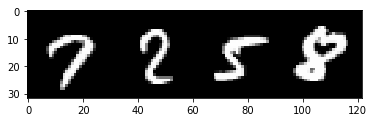

In [65]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

# MLP model

As found above, data shape is (BACTH_SIZE, N_CHANNELS, WIDTH, HEIGHT). To feed our MLP network, we need to flatten the three last dimensions. We can do so with `Tensor.view()`.

In [66]:
# http://pytorch.org/docs/master/tensors.html#torch.Tensor.view
images.view(BATCH_SIZE, -1).size()

torch.Size([4, 784])

In [46]:
class SequentialMNIST(nn.Module):
    def __init__(self):
        super(SequentialMNIST, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 10)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x.view(BATCH_SIZE, -1)))
        y_pred = self.linear2(h_relu)
        return y_pred

In [80]:
model = SequentialMNIST()
model

SequentialMNIST (
  (linear1): Linear (784 -> 256)
  (linear2): Linear (256 -> 10)
)

In [81]:
def train(model, trainloader, criterion, optimizer, n_epochs=2):
    for t in range(n_epochs):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs, labels = Variable(inputs), Variable(labels)

            # TODO: why?
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels) # Compute the loss
            loss.backward() # Compute the gradient for each variable
            optimizer.step() # Update the weights according to the computed gradient

            if not i % 2000:
                print(t, i, loss.data[0])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)
train(model, trainloader, criterion, optimizer)

In [82]:
def predict(model, images):
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)  # TODO: explain why 1
    return predicted

Prediction:  
 1
 3
 1
 3
[torch.LongTensor of size 4]



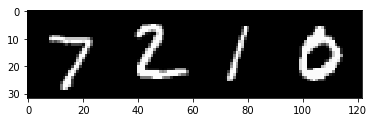

In [83]:
dataiter = iter(testloader)
images, labels = dataiter.next()

show_batch(images)
print('Prediction: ', predict(model, images))

In [84]:
def test(model, testloader, n):
    correct = 0
    for data in testloader:
        inputs, labels = data
        pred = predict(model, inputs)
        correct += (pred == labels).sum()
    return 100 * correct / n

print('Accuracy: ', test(model, testloader, len(testset)))

Accuracy:  7.74


# CNN

In [73]:
class CNNMNIST(nn.Module):
    pass # TODO

In [74]:
model = CNNMNIST()
model

CNNMNIST (
)